In [18]:
import matplotlib.pyplot as plt

import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [19]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 10

In [20]:
import pandas as pd

import numpy as np

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

**The data**

In [54]:
df = pd.read_csv("../two_bits_counting_over_cs.csv", index_col=0)

In [41]:
cdf = df[(df['c'] == 0.5) & (df['beta'] == 1)]

In [42]:
high = cdf[cdf['frequencies'] > 10 ** 3 + 10]

In [43]:
X = high[['p_4', 'p_2', 'p_1']].values

In [44]:
x = np.arange(0, 1, 0.03)

y1 = np.arange(0, 1, 0.03)

y2 = np.arange(0, 1, 0.03)

xx1, yy1 = np.meshgrid(x, y1)

z = 1 - (.5 / 1) + xx1 * 0 + yy1 * 0

z2 = 1 - (.5 / 2 * 1)

In [45]:
r0 = 1 - (.5 / 1)

r1 = 1 - (.5 / 2 * 1)

In [46]:
v = np.array([[0, 0, 1],
              [0, r1, 1],
              [r0, r1, 1],
              [r0, 0, 1]])

verts = [[v[0], v[1], v[2], v[3], v[0]]]

In [47]:
col = plt.cm.Greens

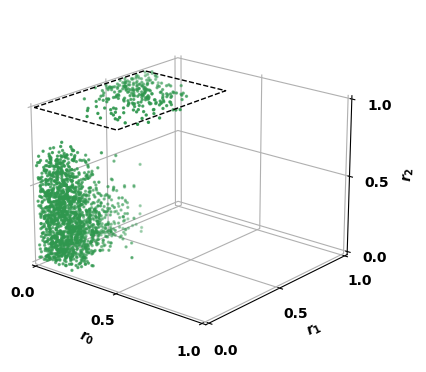

In [48]:
%matplotlib inline

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(121, projection='3d', computed_zorder=False)

axes = [ax1]

ax1.scatter(X[:,0], X[:,1], X[:,2], color=col(0.7), s=2, zorder=-2)

ax1.add_collection3d(Poly3DCollection(verts, facecolors="tab:green", alpha=.0,
                                     linewidths=1,
                                     linestyle='--',
                                     edgecolors='black',
                                     zorder=0))

ax1.view_init(20, -50)

ax1.set_xlim(0, 1);
ax1.set_ylim(0, 1);
ax1.set_zlim(0, 1);


# ax1.annotate("partners strategies", (0.01, 0.015), fontsize=8, rotation=-15, color="black", zorder=1);


ax1.set_xticks(np.linspace(0, 1, 3));
ax1.set_zticks(np.linspace(0, 1, 3));
ax1.set_yticks(np.linspace(0, 1, 3));

ax1.set_xlabel("$r_0$", fontsize=10)
ax1.set_ylabel("$r_1$", fontsize=10)

ax1.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax1.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax1.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax1.set_zlabel("$r_2$", fontsize=10);


# fig.savefig("../figures/counting_strategies_evolution.pdf", bbox_inches='tight')

In [55]:
groups = df.groupby("beta")

In [56]:
len(list(groups))

4

In [58]:
per_beta_points = []
for i, group in groups:
    print(i)
    points = []
    group = group.sort_values("c")
    cost_groups = group.groupby("c")
    
    for j, cost_group in cost_groups:
        points.append(sum(cost_group['frequencies norm'] * cost_group['cooperation']))
        
    per_beta_points.append(points)

0.1
1.0
2.0
10.0


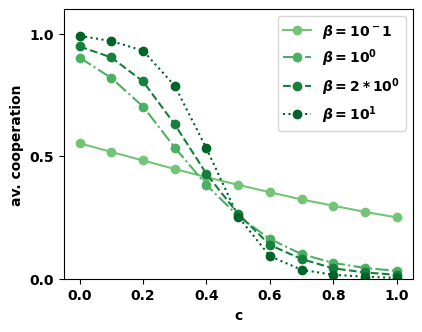

In [59]:
fig, ax = plt.subplots(figsize=(4.5, 3.5));

for i, points, style, beta in zip([.5, .6, .8, .9],
                            per_beta_points,
                            ["-o", "-.o", "--o", ":o"],
                            ["10^-1", "10^0", "2 * 10^0", "10^1"]):
    
    ax.plot(np.linspace(0, 1, 11), points, style, color=col(i), label=fr"$\beta={beta}$")
    
ax.set_ylim(0, 1.1)

ax.set_yticks([0, .5, 1])

ax.set_xlabel("c")

ax.set_ylabel("av. cooperation");

plt.legend();

# fig.savefig("../figures/counting_strategies_evolution_betas.pdf", bbox_inches='tight')